<a href="https://colab.research.google.com/github/Deepthi-cloud/Machine-Learning-Capstone-Project-/blob/master/Final_Simple_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test', 'train.csv', 'sample_submission.csv']


In [0]:
import os,cv2
import json
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from tqdm import tqdm, tqdm_notebook
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
PATH = "../input"
!ls {PATH}

sample_submission.csv  test  train  train.csv


In [0]:
train_dir = "../input/train/train"
test_dir = "../input/test/test"

In [0]:
df_train = pd.read_csv(f'{PATH}/train.csv',low_memory=False)
df_test = pd.read_csv(f'{PATH}/sample_submission.csv',low_memory=False)
df_train.has_cactus= df_train.has_cactus.astype(str)

In [0]:
print('Shape of Training data: {}'.format(df_train.shape))
print('Features: {}'.format(df_train.columns))

Shape of Training data: (17500, 2)
Features: Index(['id', 'has_cactus'], dtype='object')


In [0]:
df_train.tail()

,id,has_cactus
17495,ffede47a74e47a5930f81c0b6896479e.jpg,0
17496,ffef6382a50d23251d4bc05519c91037.jpg,1
17497,fff059ecc91b30be5745e8b81111dc7b.jpg,1
17498,fff43acb3b7a23edcc4ae937be2b7522.jpg,0
17499,fffd9e9b990eba07c836745d8aef1a3a.jpg,1


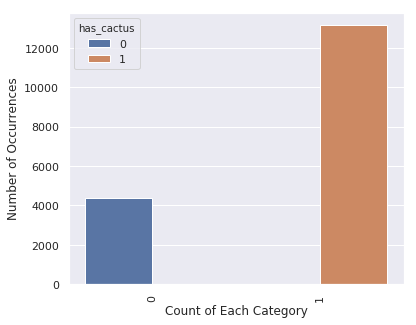

In [0]:
plt.figure(figsize = (6,5))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'has_cactus',hue='has_cactus',data = df_train)
plt.xticks(rotation='vertical')
plt.xlabel('Count of Each Category', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

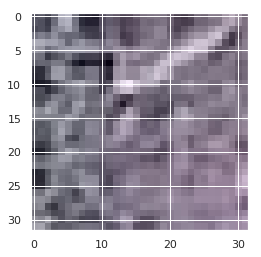

In [0]:
im = cv2.imread("../input/train/train/01e30c0ba6e91343a12d2126fcafc0dd.jpg")
plt.imshow(im)

In [0]:
train_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1/.255)

In [0]:
batch_size= 128

train_generator = train_datagen.flow_from_dataframe(df_train[:15000], directory=train_dir, x_col='id', y_col='has_cactus', 
                    target_size=(150, 150), color_mode='rgb', classes=None, class_mode='binary',
                    batch_size=batch_size, 
                    shuffle=True, seed=None, 
                    save_to_dir=None, save_prefix='', save_format='png', 
                    subset=None, interpolation='nearest', drop_duplicates=True)

valid_generator = valid_datagen.flow_from_dataframe(df_train[15000:], directory=train_dir, x_col='id', y_col='has_cactus', 
                    target_size=(150, 150), color_mode='rgb', classes=None, 
                    class_mode='binary', batch_size=batch_size, 
                    shuffle=True, seed=None, 
                    save_to_dir=None, save_prefix='', save_format='png', 
                    subset=None, interpolation='nearest', drop_duplicates=True)

Found 15000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [0]:
model=models.Sequential()

model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.4))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.4))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.4))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 33, 33, 64)        36928     
__________

In [0]:
#optim = SGD(lr=0.02, momentum=0.5, decay=0.0, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [0]:
filepath = "my_model_new.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=15)
call_backs_list = [checkpoint,early]

In [0]:
%%time

history = model.fit_generator(train_generator,validation_data = valid_generator,
                              validation_steps=valid_generator.n//batch_size,
                              epochs=100,
                              steps_per_epoch=train_generator.n//batch_size,callbacks=call_backs_list,
                              verbose=2)

Epoch 1/100
 - 83s - loss: 4.4694 - acc: 0.6488 - val_loss: 2.8381 - val_acc: 0.7504

Epoch 00001: val_acc improved from -inf to 0.75041, saving model to my_model_new.hdf5
Epoch 2/100
 - 77s - loss: 3.1038 - acc: 0.6684 - val_loss: 0.6912 - val_acc: 0.7449

Epoch 00002: val_acc did not improve from 0.75041
Epoch 3/100
 - 79s - loss: 1.5830 - acc: 0.6445 - val_loss: 0.4358 - val_acc: 0.7567

Epoch 00003: val_acc improved from 0.75041 to 0.75675, saving model to my_model_new.hdf5
Epoch 4/100
 - 80s - loss: 0.9753 - acc: 0.6611 - val_loss: 0.4861 - val_acc: 0.7525

Epoch 00004: val_acc did not improve from 0.75675
Epoch 5/100
 - 79s - loss: 0.7717 - acc: 0.6718 - val_loss: 0.4985 - val_acc: 0.7508

Epoch 00005: val_acc did not improve from 0.75675
Epoch 6/100
 - 80s - loss: 0.6686 - acc: 0.6945 - val_loss: 0.4788 - val_acc: 0.7407

Epoch 00006: val_acc did not improve from 0.75675
Epoch 7/100
 - 80s - loss: 0.6051 - acc: 0.7155 - val_loss: 0.4554 - val_acc: 0.7563

Epoch 00007: val_acc di


Epoch 00056: val_acc did not improve from 0.95868
Epoch 57/100
 - 83s - loss: 0.1320 - acc: 0.9481 - val_loss: 0.1398 - val_acc: 0.9507

Epoch 00057: val_acc did not improve from 0.95868
Epoch 58/100
 - 82s - loss: 0.1245 - acc: 0.9511 - val_loss: 0.1584 - val_acc: 0.9486

Epoch 00058: val_acc did not improve from 0.95868
Epoch 59/100
 - 81s - loss: 0.1274 - acc: 0.9494 - val_loss: 0.1253 - val_acc: 0.9549

Epoch 00059: val_acc did not improve from 0.95868
Epoch 60/100
 - 82s - loss: 0.1218 - acc: 0.9535 - val_loss: 0.1410 - val_acc: 0.9511

Epoch 00060: val_acc did not improve from 0.95868
Epoch 61/100
 - 81s - loss: 0.1222 - acc: 0.9517 - val_loss: 0.1313 - val_acc: 0.9552

Epoch 00061: val_acc did not improve from 0.95868
Epoch 62/100
 - 81s - loss: 0.1190 - acc: 0.9546 - val_loss: 0.1350 - val_acc: 0.9553

Epoch 00062: val_acc did not improve from 0.95868
Epoch 63/100
 - 81s - loss: 0.1173 - acc: 0.9527 - val_loss: 0.1606 - val_acc: 0.9511

Epoch 00063: val_acc did not improve fro

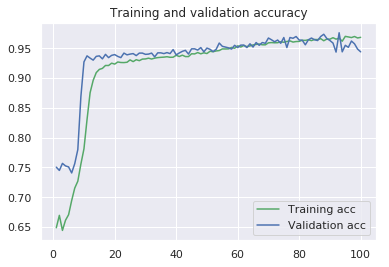

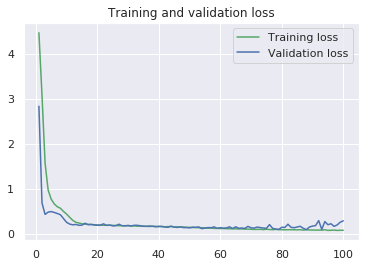

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model.load_weights("my_model_new.hdf5")

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [0]:
test_imgs = []
count = 0
for img in os.listdir("../input/test/test/"):
    test_imgs.append(img)
    count+=1
test_set = []
for i in tqdm(range(count)):
    img = image.load_img('../input/test/test/'+ test_imgs[i],target_size=(150,150,3),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_set.append(img)
test_set_images = np.array(test_set)


100%|██████████| 4000/4000 [00:03<00:00, 1262.44it/s]


In [0]:
test_set_images.shape

(4000, 150, 150, 3)

In [0]:
output = model.predict_classes(test_set_images)

In [0]:
submission_save = pd.DataFrame()
submission_save['id'] = test_imgs
submission_save['has_cactus'] = output
submission_save.to_csv('submissionV1.0.csv', header=True, index=False)